## ASSIGNMENT 8

### Section 1

Write Qiskit code to Implement QKD Algorithm..
Refer: https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-keydistribution.ipynb

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np

┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

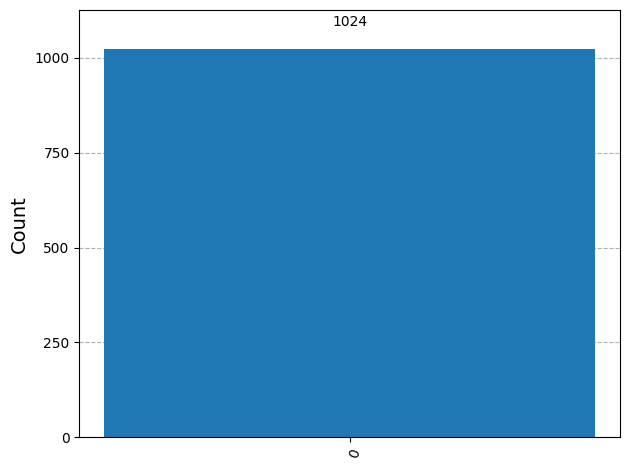

In [2]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
qc.barrier()
# Alice now sends the qubit to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc)
plot_histogram(job.result().get_counts())

┌───┐┌─┐ ░ ┌───┐┌─┐
  q: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

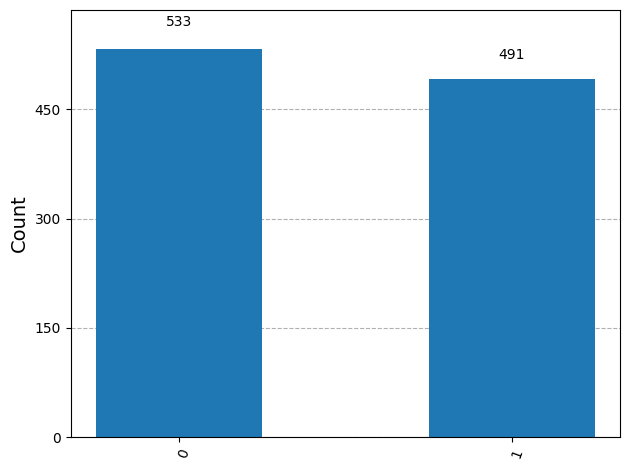

In [3]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
# Alice now sends the qubit to Bob
# but Eve intercepts and tries to read it
qc.measure(0, 0)
qc.barrier()
# Eve then passes this on to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc)
plot_histogram(job.result().get_counts())

Alice generates her random set of bits:

In [4]:
np.random.seed(seed=0)
n = 100
## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)
print(alice_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


In [5]:
np.random.seed(seed=0)
n = 100
## Step 1
#Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
print(alice_bases)

[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


In [6]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

Alice chooses to encode each bit on qubit in the X or Z-basis at random, and stores the choice for each qubit in alice_bases. In this case, a 0 means "prepare in the Z-basis", and a 1 means "prepare in the 
X-basis"

In [7]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

In [8]:
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])

bit = 0
basis = 1


In [9]:
message[0].draw()

┌───┐ ░ 
  q: ┤ H ├─░─
     └───┘ ░ 
c: 1/════════

In [10]:
print('bit = %i' % alice_bits[4])
print('basis = %i' % alice_bases[4])
message[4].draw()

bit = 1
basis = 0


┌───┐ ░ 
  q: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════

Bob then measures each qubit in the X or Z-basis at random and stores this information:

In [11]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
print(bob_bases)

[1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


In [12]:
def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        result = aer_sim.run(message[q], shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [13]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

We can see that the circuit in message[0] (representing the 0th qubit) has had an X-measurement added to it by Bob:

In [14]:

message[0].draw()

┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

Since Bob has by chance chosen to measure in the same basis Alice encoded the qubit in, Bob is guaranteed to get the result 0. For the 6th qubit (shown below), Bob's random choice of measurement is not the same as Alice's, and Bob's result has only a 50% chance of matching Alices'.

In [15]:
message[6].draw()

┌───┐ ░ ┌───┐┌─┐
  q: ┤ X ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

In [16]:
print(bob_results)

[0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1]


If Bob happened to measure a bit in the same basis Alice prepared it in, this means the entry in bob_results will match the corresponding entry in alice_bits, and they can use that bit as part of their key. If they measured in different bases, Bob's result is random, and they both throw that entry away. Here is a function remove_garbage that does this for us:

In [17]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

In [18]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(f"Alice's Key: {alice_key}")
print(f"Bob's Key: {bob_key}")

Alice's Key: [np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0)]
Bob's Key: [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


Finally, Bob and Alice compare a random selection of the bits in their keys to make sure the protocol has worked correctly

In [19]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in 
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample

So this is the final code:

In [20]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)

## Step 5
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
alice_sample = [np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0)]


In [21]:
if bob_sample == alice_sample:
    print("Bob and Alice's samples match!")

Bob and Alice's samples match!


In [22]:
print(bob_key)
print(alice_key)
print("key length = %i" % len(alice_key))

[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0)]
key length = 33


Essential functions used in the code above:
encode_message(bits, bases)
measure_message(message, bases)
remove_garbage(a_bases, b_bases, bits)
sample_bits(bits, selection)

The above functions are used to encode, measure, and sample bits in the QKD protocol.

- The encode_message function prepares qubits in the specified bases and encodes the bits.
- The measure_message function measures the qubits in the specified bases and returns the measured bits.
- The remove_garbage function filters out bits that were not measured in the same basis as they were prepared.
- The sample_bits function samples bits from the list based on the provided selection indices.

## Section 2
Write Qiskit code to Implement BB84 Algorithm..

In [23]:
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import QasmSimulator
%matplotlib inline

Step 1: Generate Binary Strings

Alice will generate two strings(consisting of 0s and 1s). One string will encode the basis for each qubit and the other string will encode its state.

0 in the hadamard basis will be represented as state 
 and 1 in the hadamard basis is represented as state 
. The hadamard basis can be seen as the result of applying a hadamard gate on the computational basis 
 or 
. The computational basis will be represented by 0 and hadamard basis by 1. Let us suppose that Alice wants to generate a 32 bit string. The number of qubits needed is 32. We will generate two random strings that represent Alice's state and the basis that Alice uses for encoding the state( the information about which basis Alice uses for encoding the state is very important for Bob to decrypt the message using the key)

In [24]:
num_qubits = 32

alice_basis = np.random.randint(2, size=num_qubits)
alice_state = np.random.randint(2, size=num_qubits)
bob_basis = np.random.randint(2, size=num_qubits)


print(f"Alice's State:\t {np.array2string(alice_state)}")
print(f"Alice's Bases:\t {np.array2string(alice_basis)}")
print(f"Bob's Bases:\t {np.array2string(bob_basis)}")


Alice's State:	 [1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0]
Alice's Bases:	 [1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0]
Bob's Bases:	 [1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0]


Step 2: Creating the circuit using BB84 protocol

We will use this algorithm to construct the circuit

- Whenever Alice wants to encode 1 in a qubit, she applies an X gate to the qubit. To encode 0, no action is needed as the qubits in qiskit are by default initialized to state 0 and applying an X gate is the equivalent of applying NOT.

- Wherever she wants to encode it in the Hadamard basis, she applies an hadamard gate. No action is necessary to encode a qubit in the computational basis as the default basis in qiskit is the computational basis

- She then *sends* the qubits to Bob

- Bob measures the qubits according to his binary string. To measure a qubit in the Hadamard basis, he applies an hadamard gate to the corresponding qubit and then performs a measurement on the computational basis.

In [25]:
def bb84_circuit(state, basis, measurement_basis):
   
    # state: array of 0s and 1s denoting the state to be encoded
    # basis: array of 0s and 1s denoting the basis to be used for encoding
    # measurement_basis: array of 0s and 1s denoting the basis to be used for measurement
    
    num_qubits = len(state)
    
    circuit = QuantumCircuit(num_qubits)

    # Sender prepares qubits
    for i in range(len(basis)):
        if state[i] == 1:
            circuit.x(i)        # <-- fixed here
        if basis[i] == 1:
            circuit.h(i)        # <-- fixed here

    # Measuring action performed by Bob
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            circuit.h(i)        # <-- fixed here

    circuit.measure_all()
    
    return circuit


Step 3: Creating the key

Alice and Bob only keep the bits in the strings where the bases match. For example, in the example above only if Alice's encoding basis is 0 and Bob's measuring basis is 0 or its 1 and 1 the bits are kept

The probability that their bases match is 0.5 as the probability that Alice chooses computational basis is 0.5 and probability that Bob chooses computational basis is 0.5 so the probability that both choose computational basis is 0.25 (1/4) or the probability that both choose hadamard basis is (0.5*0.5) so in total the probability that both their bases match is 0.5

Here are all the possibilities for the BB84 protocol:

![image](https://res.cloudinary.com/dnciaoigz/image/upload/v1745823327/Screenshot_2025-04-28_122409_ygho6e.png)

Step 4: Executing the circuit

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

# create the circuit (using your bb84_circuit function)
circuit = bb84_circuit(alice_state, alice_basis, bob_basis)


# # transpile the circuit for the simulator (doesnt work on my system)
# from qiskit import transpile
# circuit = transpile(circuit, optimization_level=1)

# create the simulator
simulator = AerSimulator()

# run the circuit
job = simulator.run(circuit, shots=1)
result = job.result()

# get the measurement results
counts = result.get_counts()

# get the most frequent result (only 1 shot, so just take the only one)
key = list(counts.keys())[0]

# now generate the encryption key
encryption_key = ''
for i in range(len(alice_state)):
    if alice_basis[i] == bob_basis[i]:
        encryption_key += key[::-1][i]   # reverse bits because measurement returns them reversed

print(f"Key: {encryption_key}")


Key: 110011011001100110


: 